## About this tutorial 

To do deep learning in practice, you need a Graphics Processing Unit (GPU). Or the time needed to train your deep neural nets on the CPU of your machine will be prohibitive.

We have seen how to [install TensorFlow on Windows](https://thedatafrog.com/install-tensorflow-windows/) and [on Linux](https://thedatafrog.com/install-tensorflow-ubuntu/), which is useful if you have an nvidia graphics card in your PC. 

But what if you don't? 

If you just want to learn deep learning, there is a very easy solution that requires **no specific hardware or software**, the Colaboratory platform from Google.

Let's try and use it for the first time. 

In this tutorial, you will learn: 

* What is the google colaboratory platform and how to use it. 
* How to set up a first convolutional neural network to recognize handwritten digits with very high accuracy 

**Prerequisites**

* Please have a look at [my first tutorial on handwritten digits](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/). This will show you which kind of performance we can get without deep learning, and will teach you the basics of numpy, matplotlib, and neural networks. 
* You should know a bit of [Keras](https://thedatafrog.com/first-neural-network-keras/)


## Google Colaboratory Platorm

Google set up the [Colaboratory Platform](https://colab.research.google.com/notebooks/welcome.ipynb) to promote the use of TensorFlow for deep learning, and it's awesome! 

It provides: 

* python environments with all the necessary software, and you can install more if needed
* access to GPUs
* excellent tutorials
* the possibility to run your own code (and my stuff!)

In particular, the author of Keras and google engineer François Chollet set up extremely useful tutorials in which Keras is used as an interface to TensorFlow, such as [this one](https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/fashion_mnist.ipynb) where we learn how to classify clothing items (trousers, shoes, and whatnot). 

I do encourage you to dig into the google colab tutorials on your own! I would only advise you to stick to the keras-based tutorials which are much easier. 

On my side, I intend to use this tool to provide you with original content, and more details about the subjects already covered by google. 

💡 **To run your jupyter notebook on google colab, you just need to commit it to github, and to provide a specific url to direct google colab to the notebook.**

The url of this tutorial on github is https://github.com/cbernet/maldives/blob/master/hwd_deeplearning_google/hwd_dl_google.ipynb

The url to run it on google colab is https://colab.research.google.com/github/cbernet/maldives/blob/master/hwd_deeplearning_google/hwd_dl_google.ipynb

Just follow this link now, and click on CONNECT on the top right side. 


## The Dataset

In [my first tutorial on handwritten digits](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/), we have used the simplify digits dataset provided with scikit-learn for simplicity, and because we didn't have the resources to process the [real MNIST handrwitten digits dataset](http://yann.lecun.com/exdb/mnist/) at that time. 

Here, we have access to TensorFlow, which provides an easy access to this dataset

In [16]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Let's have a look our dataset.

In [17]:
print x_train.shape, y_train.shape, x_test.shape, y_test.shape

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


so: 

* 60,000 training samples and 10,000 test samples
* images are 28x28 = 784 pixels, while they are 8x8=64 pixels in the digits dataset of sckikit-learn. We have images with much better resolution, but need networks with many more neurons to process them

Now let's plot some of them. 

In [18]:
import matplotlib.pyplot as plt
def plot_img(i):
    # plot the image and the target for sample i
    plt.imshow(x_train[i])
    plt.title(y_train[i])

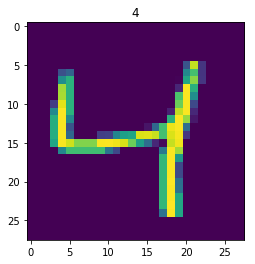

In [19]:
plot_img(2)

Please have a look at other images by repeating the plot above for different samples

Now we should check the actual data for a given image:

In [20]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We see that the values in the image array are between 0 and 255 (the value seems to be coded on 8 bits). 

This is not adequate. Indeed, for a neural network to work well, it must deal with input values close to unity, and the weights in the network should be kept small. So we're going to normalize all images to values between 0. and 1: 

In [26]:
import numpy as np
x_train = np.divide(x_train, 255.)
print np.amax(x_train)

1.0


In [27]:
x_test = np.divide(x_test, 255.)

We should also check our targets: 

In [28]:
y_train[0]

5

For the reasons explained in [our first keras tutorial](https://thedatafrog.com/first-neural-network-keras/), we're going to perform one-hot encoding on the targets: 

In [38]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, 10)
print y_train[0]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [39]:
y_test = np_utils.to_categorical(y_test, 10)

## Convolutional Neural Networks